In [1]:
print("Hello world ")

Hello world 


In [30]:
# Importing labraries 
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from bioinfokit.visuz import cluster
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [3]:
# Fetching the dataset from local Machine
df = pd.read_csv("C:\\Users\91976\Downloads\mcdonalds.csv")

In [4]:
# Printing the first 3 rows
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


### Exploring Data

In [5]:
# printing columns name
for col in df.columns:
    print(col)

yummy
convenient
spicy
fattening
greasy
fast
cheap
tasty
expensive
healthy
disgusting
Like
Age
VisitFrequency
Gender


In [6]:
# Printing dimension ( 1453 are Rows & 15 are Columns)
df.shape

(1453, 15)

In [7]:
# Converting 'Yes' , 'No' (String data) to '1' , '0' (Integer data)
df1 = df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']].replace({'Yes' : 1 , 'No' : 0 })

In [8]:
# Calculating mean
df1.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

In [9]:
# fitting the 11 coloums in PCA
pca = PCA(11)

In [10]:
# fit the dataset
pca.fit(df1)


PCA(n_components=11)

In [11]:
std_dev = []
for i in df1:
    std_dev.append(np.std(df1[i]))
    
print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([0.49722028, 0.28934047, 0.29127065, 0.33938943, 0.49929742,
       0.29972451, 0.49014919, 0.47875969, 0.47937665, 0.39917175,
       0.42886251])

In [12]:
# printing 'Proprotion of Variance '
print(" Proportion of Variance =  ",pca.explained_variance_ratio_)

 Proportion of Variance =   [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [13]:
# printing ' cumulative proprotion '
Cumulative_Proportion = np.cumsum(pca.explained_variance_ratio_)
print( "Cumulative Proportion =  ", Cumulative_Proportion)

Cumulative Proportion =   [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [14]:
# Rotation (n x k) = (11 x 11)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df1.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df*-1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,0.476933,-0.363790,0.304444,-0.055162,0.307535,-0.170738,0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,0.142425,-0.277608,0.347830,0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,-0.197619,-0.070620,0.355087,-0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,0.354139,0.073405,0.406515,0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,-0.253960,-0.361399,-0.209347,-0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,0.097363,-0.107930,0.594632,0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,-0.118958,0.128973,0.103241,0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,0.002547,0.210899,0.076914,-0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,-0.067816,0.003125,0.261342,0.068385,-0.029539,-0.066996,-0.454399,0.490069


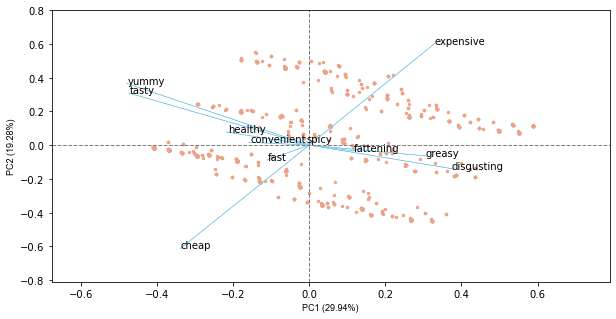

In [15]:
# get PC scores
pca_scores = PCA().fit_transform(df1)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))


### Extracting Segments 

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df1)
df['cluster_num'] = kmeans.labels_

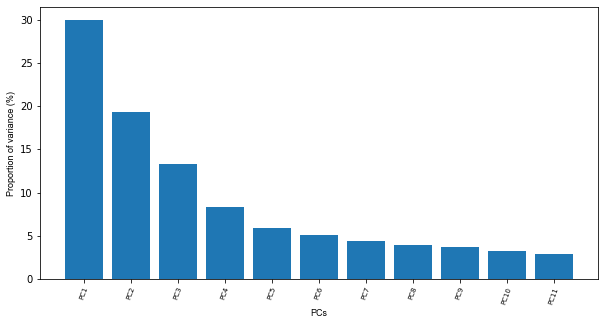

In [17]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

array([[<AxesSubplot:title={'center':'yummy'}>,
        <AxesSubplot:title={'center':'convenient'}>,
        <AxesSubplot:title={'center':'spicy'}>],
       [<AxesSubplot:title={'center':'fattening'}>,
        <AxesSubplot:title={'center':'greasy'}>,
        <AxesSubplot:title={'center':'fast'}>],
       [<AxesSubplot:title={'center':'cheap'}>,
        <AxesSubplot:title={'center':'tasty'}>,
        <AxesSubplot:title={'center':'expensive'}>],
       [<AxesSubplot:title={'center':'healthy'}>,
        <AxesSubplot:title={'center':'disgusting'}>, <AxesSubplot:>]],
      dtype=object)

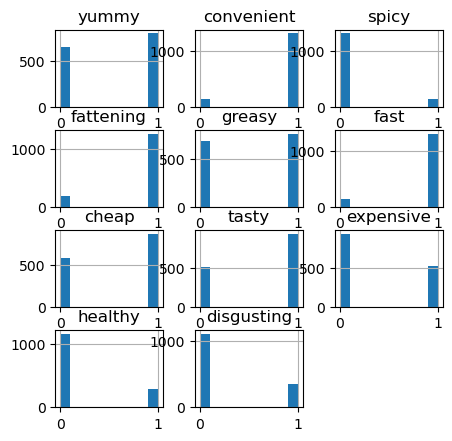

In [53]:
df1.hist()

In [19]:
#Printing describetion of 'Like' coloum
df.Like.describe

<bound method NDFrame.describe of 0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object>

In [20]:
# replacing the String values to numarical values
df.Like = df.Like.str.replace('\D','',regex=True)


In [21]:
df.Like


0       3
1       2
2       1
3       4
4       2
       ..
1448    5
1449    2
1450    3
1451    4
1452    3
Name: Like, Length: 1453, dtype: object

In [22]:
# printing coloums name
column_names = df.columns[0:11] 
for col in column_names:
    print(col,end =" + " )


yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting + 

In [23]:
import numpy as np
from sklearn.mixture import GaussianMixture

np.random.seed(1234)



# Fitting a flexible mixture model
model = GaussianMixture(n_components=2, n_init=10, random_state=1234)
model.fit(df1)

# Printing the result
print(model)

# Refitting the model
model_refit = GaussianMixture(n_components=2, n_init=1, random_state=1234)
model_refit.weights_ = model.weights_
model_refit.means_ = model.means_
model_refit.covariances_ = model.covariances_

# Summarizing the refitted model
#print(model_refit)
print( model.covariances_)


GaussianMixture(n_components=2, n_init=10, random_state=1234)
[[[ 2.01563386e-01  3.52746731e-02  1.79569362e-02 -1.36834319e-02
   -2.05365622e-02 -3.50692161e-02  1.51672876e-02  1.45586785e-01
    4.57484110e-03  4.06074220e-02 -7.22432246e-02]
  [ 3.52746731e-02  2.04343903e-01  8.30046022e-03  2.16140697e-02
    8.07217472e-03  5.30535470e-03  2.62254365e-02  4.47896121e-02
   -2.25728687e-02  9.22273357e-03  1.51124990e-02]
  [ 1.79569362e-02  8.30046022e-03  8.69092840e-02  2.83530572e-03
    7.47863248e-03  6.28698224e-03  7.31426693e-03  1.82856673e-02
    5.01314925e-03  2.17784352e-02  1.08070349e-02]
  [-1.36834319e-02  2.16140697e-02  2.83530572e-03  8.69092840e-02
    5.02136752e-02  2.57642998e-02  9.77975017e-03 -1.18754109e-02
    7.80736358e-03 -1.53681788e-02  3.83382643e-02]
  [-2.05365622e-02  8.07217472e-03  7.47863248e-03  5.02136752e-02
    2.00618284e-01  3.35944919e-02  7.35992402e-03 -1.17521368e-02
    2.20797721e-02 -2.16049383e-02  6.63580247e-02]
  [-3.50

In [39]:
dataset1=pd.get_dummies(df, prefix=['VisitFrequency'], columns=['VisitFrequency'])

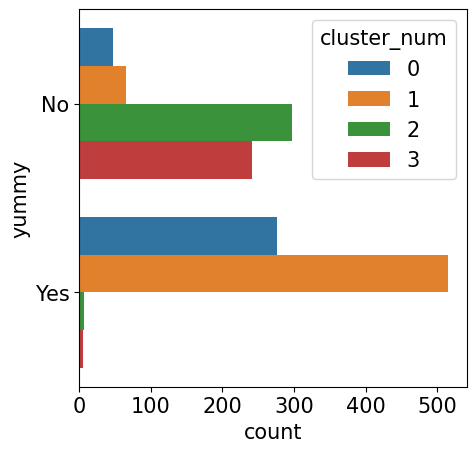

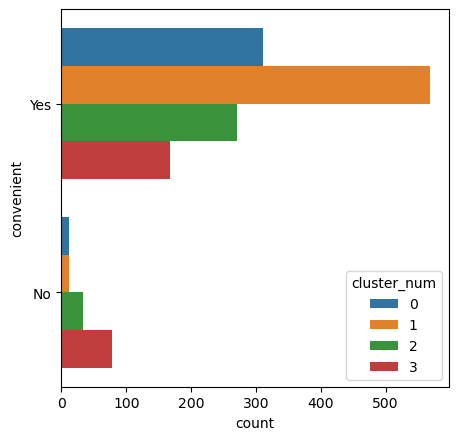

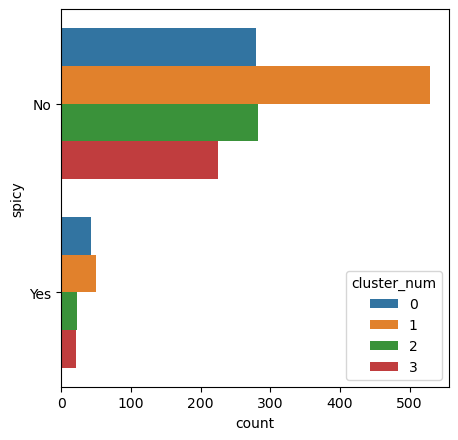

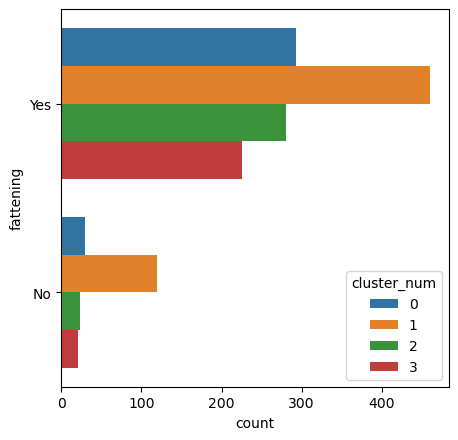

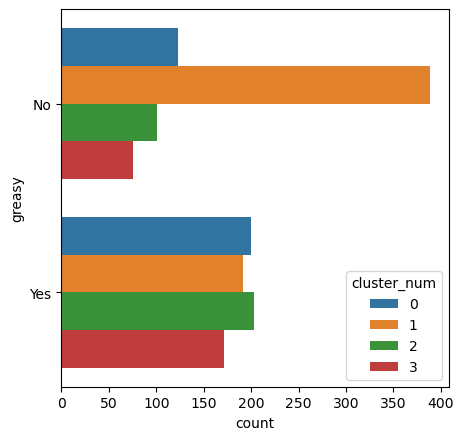

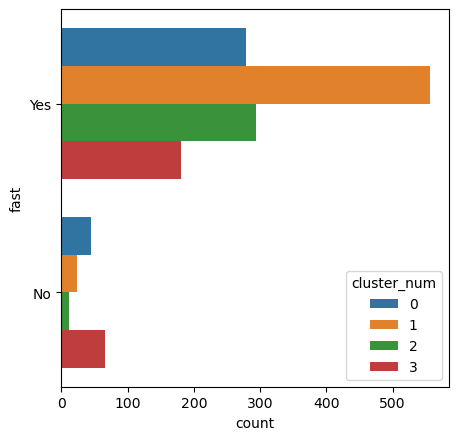

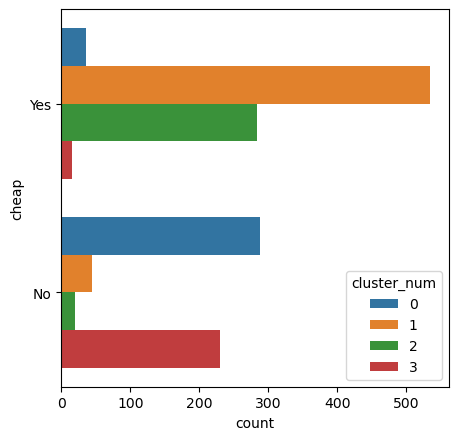

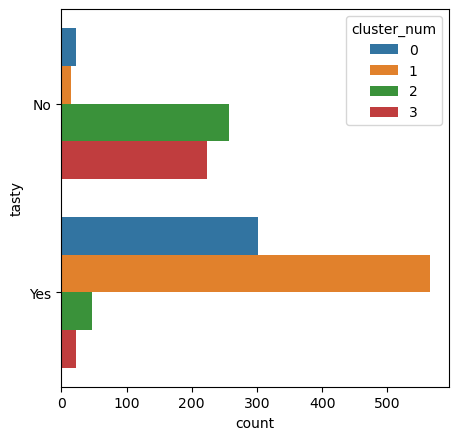

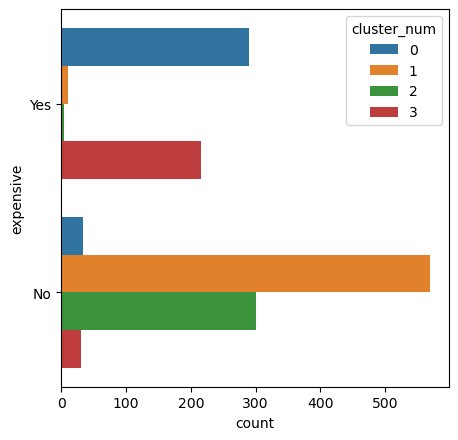

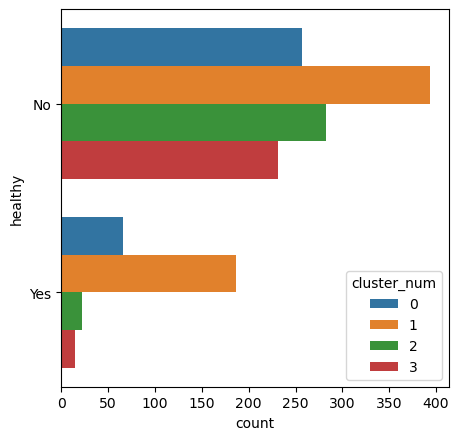

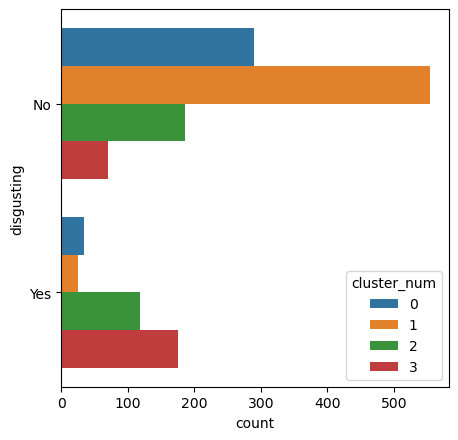

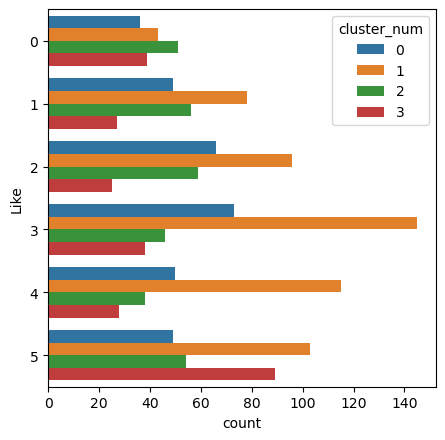

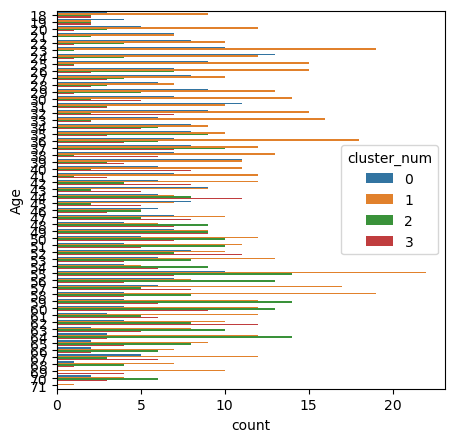

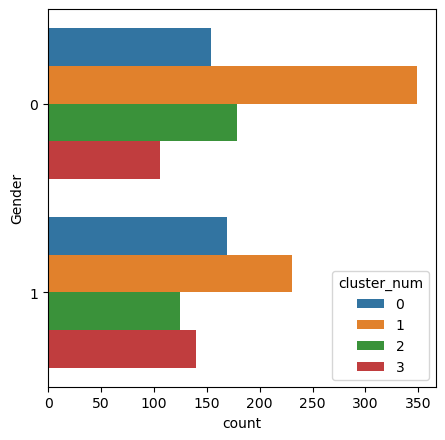

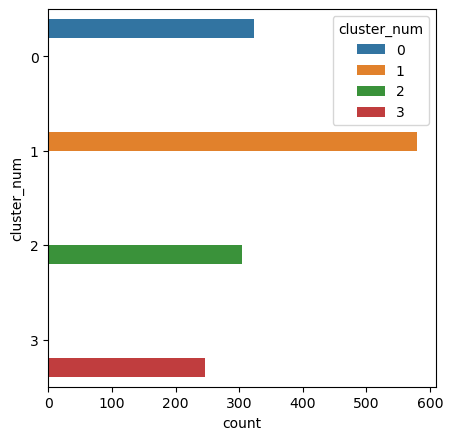

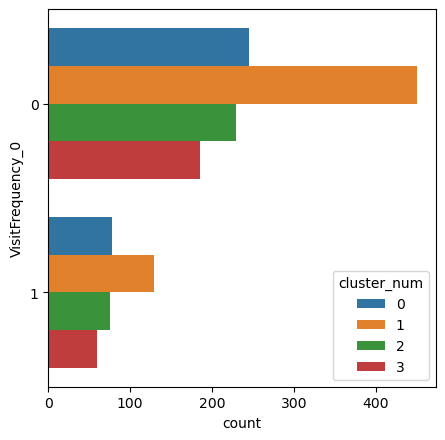

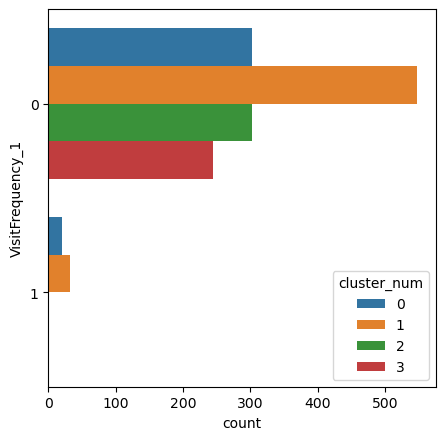

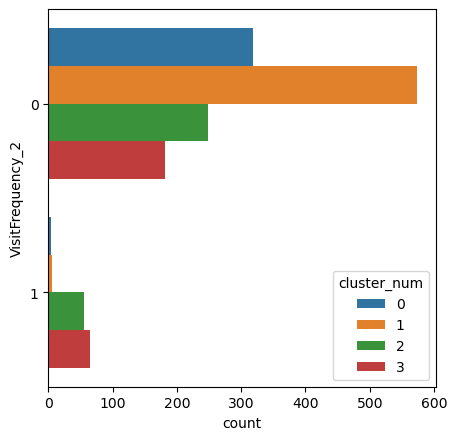

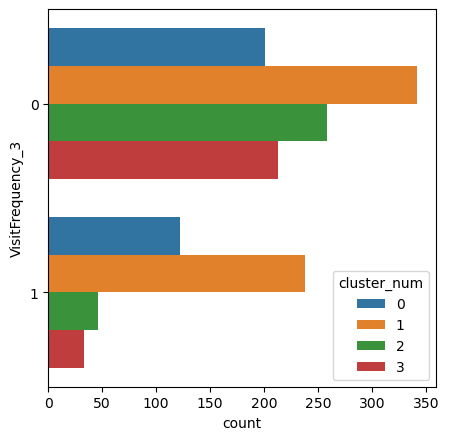

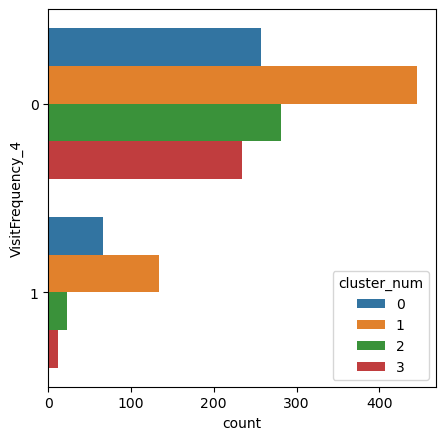

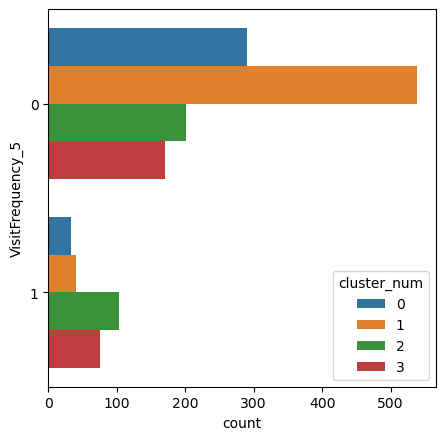

In [48]:
for i in dataset1.columns:
    sns.countplot(y=dataset1[i], hue=dataset1['cluster_num'], data=dataset1)
#     plt.rcParams['figure.figsize'] = (25, 20)
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['font.size'] = 10
    plt.show()


In [25]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['0','1','2','3','4','5']]
crosstab 

Like,0,1,2,3,4,5
cluster_num,,,,,,
0,36,49,66,73,50,49
1,43,78,96,145,115,103
2,51,56,59,46,38,54
3,39,27,25,38,28,89


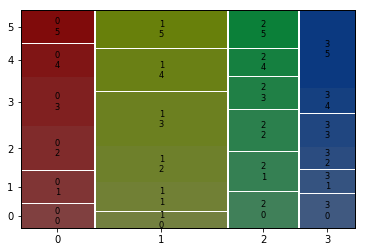

In [26]:
mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 5
plt.show()

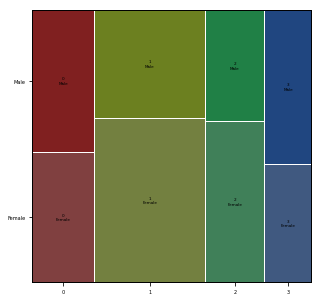

In [27]:
crosstab =pd.crosstab(df['cluster_num'],df['Gender'])
#Reordering cols
crosstab = crosstab[['Female', 'Male']]
mosaic(crosstab.stack())
plt.show()

<AxesSubplot:xlabel='cluster_num', ylabel='Age'>

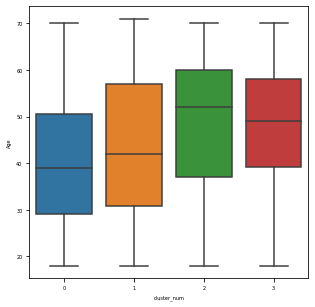

In [28]:
sns.boxplot(x='cluster_num', y='Age', data=df)

In [31]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [32]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,2.616099
1,1,2.896552
2,2,2.414474
3,3,3.040650


In [33]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [34]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,2.616099,2.547988
1,1,0.398276,2.896552,2.584483
2,2,0.411184,2.414474,2.822368
3,3,0.569106,3.040650,2.654472


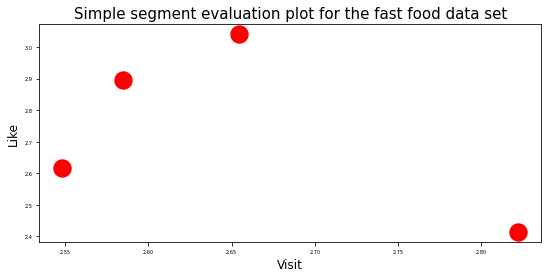

In [35]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()